#Linear Regression on the diabetes dataset

(442, 2)
(442,)


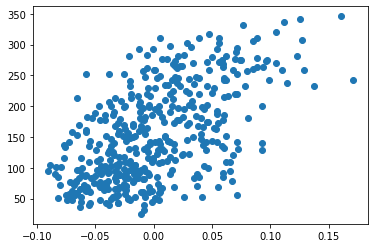

In [187]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


diabetes = datasets.load_diabetes()
X = diabetes.data[:, 1:3]
X[:,0] = 1

y = diabetes.target

print(X.shape)
print(y.shape)

plt.plot(X[:,1],y, "o")

**Exercise 1 :** Implement a linear regression model on the diabetes dataset by finding the analytical solution for the parameters (Use the matrix formulation)

[949.43526038]


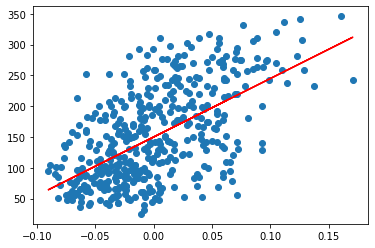

In [188]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# solve directly
from numpy import array
from numpy.linalg import inv
from matplotlib import pyplot


regr = linear_model.LinearRegression()
X_p=X[:,1].reshape(-1,1)

#print(y)
# Train the model using the training sets
regr.fit(X_p, y)




b = inv(X_p.T.dot(X_p)).dot(X_p.T).dot(y)
print(b)
# predict using coefficients
yhat = X_p.dot(b)+150
# plot data and predictions
pyplot.scatter(X_p, y)
pyplot.plot(X_p, yhat, color='red')
pyplot.show()



In [24]:
print(X_p.shape)

(442, 1)


**Exercise 2 :** Implement the Gradient Descent Algorithm and check that you get the same result as before



In [189]:

import torch
import torch.nn as nn
class LinearRegressionModel(nn.Module):#on va hériter de la classe nn.Module

    def __init__(self, input_dim, output_dim):

        super(LinearRegressionModel, self).__init__() #on hériter de toutes les méthodes  de la classe  nn.Module
        self.linear = nn.Linear(input_dim,output_dim)


#A COMPLETER, UTILISER LA FONCTION nn.Linear de PyTorch


    def forward(self, x):
        out = self.linear(x)
        return out

In [190]:



model = LinearRegressionModel(1, 1)

criterion = nn.MSELoss()

learning_rate = 0.0020
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
epochs = 5000000
y=y.reshape(X_p.shape)
print(y.shape)
print(X_p.shape)
for epoch in range(epochs):
    inputs = torch.from_numpy(X_p[0:200,]).type(torch.FloatTensor)
    labels = torch.from_numpy(y[0:200,]).type(torch.FloatTensor)
    # TODO: please complete the training script
    optimizer.zero_grad()
    y_pred=model.forward(inputs).float()
    loss = criterion(y_pred, labels)
    loss.backward()
    optimizer.step()
    if epoch % 500 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))



(442, 1)
(442, 1)
epoch 0, loss 27312.384765625
epoch 500, loss 5925.845703125
epoch 1000, loss 5523.3720703125
epoch 1500, loss 5502.267578125
epoch 2000, loss 5488.2060546875
epoch 2500, loss 5474.3857421875
epoch 3000, loss 5460.67919921875
epoch 3500, loss 5447.08642578125
epoch 4000, loss 5433.60498046875
epoch 4500, loss 5420.234375
epoch 5000, loss 5406.97265625
epoch 5500, loss 5393.81982421875
epoch 6000, loss 5380.775390625
epoch 6500, loss 5367.8388671875
epoch 7000, loss 5355.0068359375
epoch 7500, loss 5342.28076171875
epoch 8000, loss 5329.65869140625
epoch 8500, loss 5317.14111328125
epoch 9000, loss 5304.7255859375
epoch 9500, loss 5292.41259765625
epoch 10000, loss 5280.2001953125
epoch 10500, loss 5268.0869140625
epoch 11000, loss 5256.07421875
epoch 11500, loss 5244.16064453125
epoch 12000, loss 5232.34423828125
epoch 12500, loss 5220.62353515625
epoch 13000, loss 5209.00048828125
epoch 13500, loss 5197.47265625
epoch 14000, loss 5186.03857421875
epoch 14500, loss 51

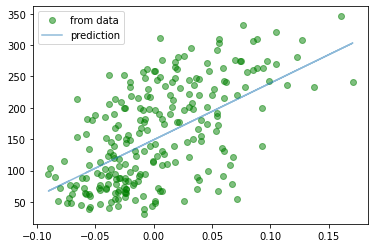

In [191]:
predicted = model.forward(torch.from_numpy(X_p[200:,]).type(torch.Tensor)).data.numpy()#equivalent de keras.predict
plt.plot(X_p[200:,], y[200:,], 'go', label='from data', alpha=0.5)
plt.plot(X_p[200:,], predicted, label='prediction', alpha=0.5)
plt.legend()
plt.show()

**Exercise 3 :** Implement the Stochastic Gradient Descent Algorithm and check that you get the same result as before

#Logistic Regression on Iris dataset

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


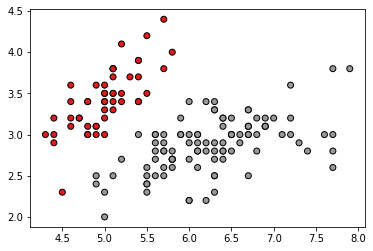

In [96]:
iris = datasets.load_iris()
X = iris.data[:, :]  # we only take the first two features.
y = iris.target

#there are 3 labels, lets reduce the problem and define only 2 labels : the label 1 remains 1, and label 2 and 3 are merged.
y[y>=1] = 1

print(X.shape)
print(y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')

**Exercise 4 :** Implement a logistic regression model that classify the iris into the right class. (Use the Gradient Descent algorithm to find the parameters)

In [173]:

class LogisticRegressionModel(nn.Module):#on va hériter de la classe nn.Module

    def __init__(self, input_dim, output_dim):

        super(LogisticRegressionModel, self).__init__() #on hériter de toutes les méthodes  de la classe  nn.Module
        self.linear = nn.Linear(input_dim,output_dim)


#A COMPLETER, UTILISER LA FONCTION nn.Linear de PyTorch


    def forward(self, x):
        out = self.linear(x)
        out=torch.sigmoid(out)
        return out

In [174]:


print(X.shape)
model2 = LogisticRegressionModel(X.shape[1], 2)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.01
optimizer = torch.optim.SGD(model2.parameters(), lr=learning_rate)
epochs = 50000
y=y.reshape(-1,1)
for epoch in range(epochs):
    inputs = torch.from_numpy(X).type(torch.LongTensor)
    labels = torch.from_numpy(y).type(torch.LongTensor)
    optimizer.zero_grad()
    y_pred=model2.forward(inputs.float())
    labels=labels.flatten()
    loss = criterion(y_pred, labels)
    loss.backward()
    optimizer.step()
    if epoch % 500 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))



(150, 4)
epoch 0, loss 0.726024329662323
epoch 500, loss 0.4569869935512543
epoch 1000, loss 0.4036239981651306
epoch 1500, loss 0.378488153219223
epoch 2000, loss 0.364303857088089
epoch 2500, loss 0.355252206325531
epoch 3000, loss 0.3489821255207062
epoch 3500, loss 0.344381183385849
epoch 4000, loss 0.34085947275161743
epoch 4500, loss 0.3380754292011261
epoch 5000, loss 0.33581778407096863
epoch 5500, loss 0.33394870162010193
epoch 6000, loss 0.332375705242157
epoch 6500, loss 0.3310328423976898
epoch 7000, loss 0.3298722803592682
epoch 7500, loss 0.3288591206073761
epoch 8000, loss 0.32796674966812134
epoch 8500, loss 0.32717469334602356
epoch 9000, loss 0.3264661431312561
epoch 9500, loss 0.3258289396762848
epoch 10000, loss 0.32525280117988586
epoch 10500, loss 0.32472875714302063
epoch 11000, loss 0.32425060868263245
epoch 11500, loss 0.32381194829940796
epoch 12000, loss 0.3234085440635681
epoch 12500, loss 0.3230355978012085
epoch 13000, loss 0.3226900100708008
epoch 13500, 

**Exercise 5 :** Use now the Stochastic Gradient Descent algorithm

#Softmax Regression on iris dataset

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


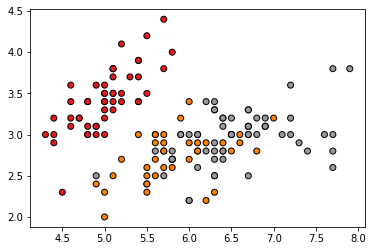

In [178]:
iris = datasets.load_iris()
X = iris.data[:, :]  # we only take the first two features.
y = iris.target

print(X.shape)
print(y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')

**Exercise 6 :** Same exercise that previous section but now with 3 different classes. (you have now to implement Softmax Regression instead of Logistic Regression)

In [181]:

class SoftmaxRegression(nn.Module):#on va hériter de la classe nn.Module

    def __init__(self, input_dim, output_dim):

        super(SoftmaxRegression, self).__init__() #on hériter de toutes les méthodes  de la classe  nn.Module
        self.linear = nn.Linear(input_dim,output_dim)


#A COMPLETER, UTILISER LA FONCTION nn.Linear de PyTorch


    def forward(self, x):
        m = nn.Softmax()
        out = self.linear(x)
        out=m(out)
        return out

In [186]:


print(X.shape)
model3 = SoftmaxRegression(X.shape[1], 3)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.01
optimizer = torch.optim.SGD(model3.parameters(), lr=learning_rate)
epochs = 50000
y=y.reshape(-1,1)
for epoch in range(epochs):
    inputs = torch.from_numpy(X).type(torch.LongTensor)
    labels = torch.from_numpy(y).type(torch.LongTensor)
    optimizer.zero_grad()
    y_pred=model3.forward(inputs.float())
    labels=labels.flatten()
    loss = criterion(y_pred, labels)
    loss.backward()
    optimizer.step()
    if epoch % 500 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))



(150, 4)
epoch 0, loss 1.1979069709777832
epoch 500, loss 1.1160672903060913
epoch 1000, loss 1.094922661781311
epoch 1500, loss 1.0881704092025757
epoch 2000, loss 1.083132028579712
epoch 2500, loss 1.0781832933425903
epoch 3000, loss 1.072547435760498
epoch 3500, loss 1.0657743215560913
epoch 4000, loss 1.0580413341522217
epoch 4500, loss 1.0500468015670776
epoch 5000, loss 1.0424730777740479
epoch 5500, loss 1.0356855392456055
epoch 6000, loss 1.0297696590423584
epoch 6500, loss 1.0246647596359253
epoch 7000, loss 1.0202608108520508
epoch 7500, loss 1.016440987586975
epoch 8000, loss 1.0131069421768188
epoch 8500, loss 1.0101737976074219
epoch 9000, loss 1.007575511932373
epoch 9500, loss 1.0052562952041626
epoch 10000, loss 1.003174066543579
epoch 10500, loss 1.0012905597686768
epoch 11000, loss 0.9995784759521484
epoch 11500, loss 0.9980144500732422
epoch 12000, loss 0.9965774416923523
epoch 12500, loss 0.9952532052993774
epoch 13000, loss 0.9940255880355835
epoch 13500, loss 0.99